# Question 1

## Script

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = '/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


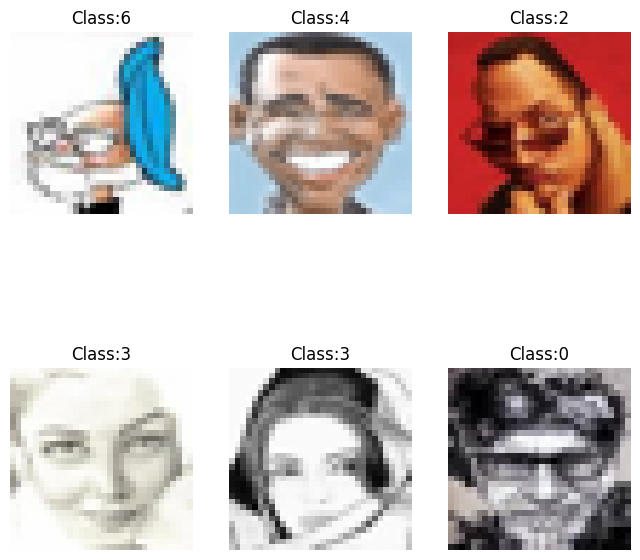

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [7]:
X.shape

(672, 32, 32, 3)

## 1.1 PCA

### Perform dimensionality reduction on the IIIT-CFW dataset, varying the number of principle components.

In [8]:
import numpy as np

data=X.reshape(X.shape[0],-1)
mean = np.mean(data, axis=0)
centered_data = data - mean
cov_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
_, s, V = np.linalg.svd(cov_matrix, hermitian=True)
sorted_indices = np.argsort(s)[::-1]
top_indices = sorted_indices[:1000]
eig_vals = V[:, top_indices]
reduced_data = np.dot(centered_data, eig_vals)


In [9]:
exp_varience=s[top_indices]
cumulative_explained_varience=np.cumsum(exp_varience)/np.sum(s)
cumulative_explained_variences=[]
number_of_components=[]

for n in range(2,1001,5):
    cumulative_explained_variences.append(cumulative_explained_varience[n-1])
    number_of_components.append(n)

### Plot the the relationship between the cumulative explained variance and the number of principal components. The x-axis of the plot typically represents the number of principal components, and the y-axis represents the cumulative explained variance.

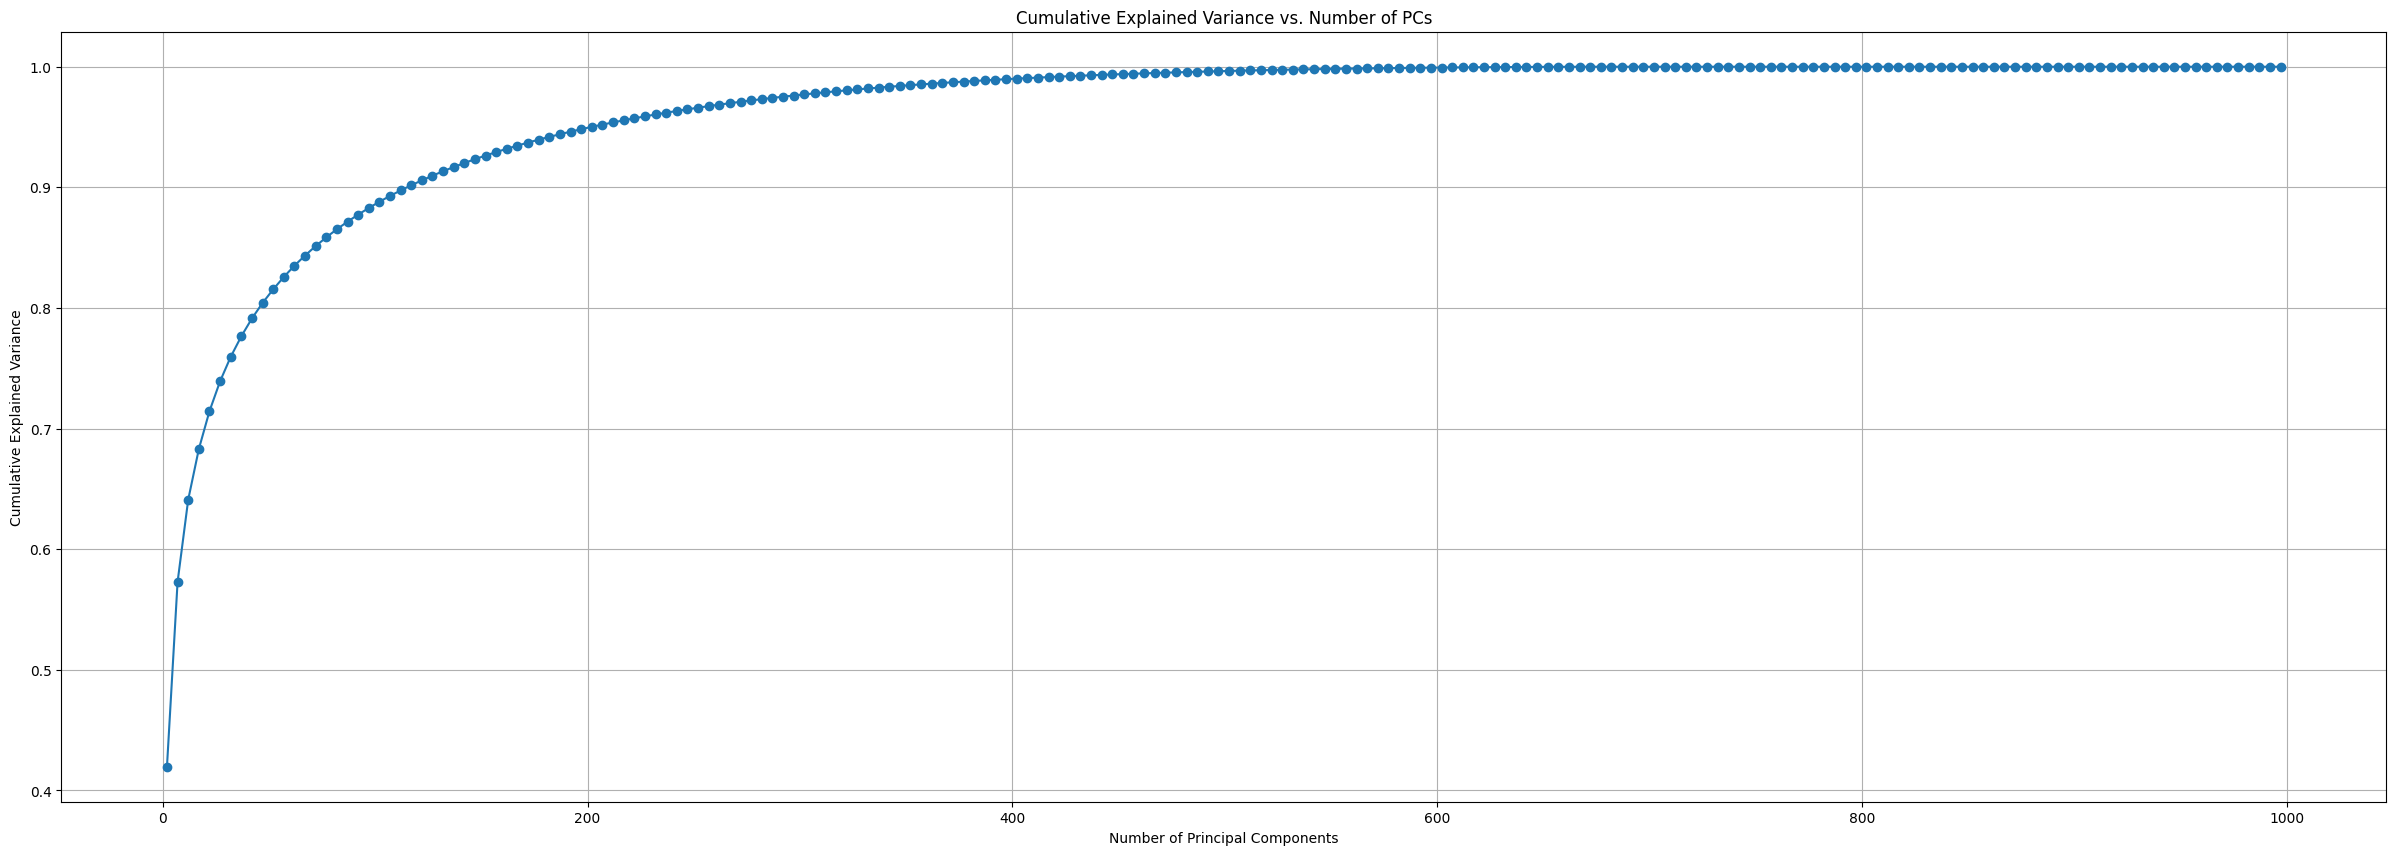

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.plot(number_of_components, cumulative_explained_variences, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of PCs')
plt.grid(True)
plt.show()

### Perform the dimensionality reduction on features that you have used for assignment 1 (pictionary dataset) and show the metrics you have shown for the assignment 1.

In [11]:
import numpy as np
data=np.load("data.npy",allow_pickle=True)

In [12]:
resnet_x=[]
vit_x=[]
labels=[]

for i in data:
    resnet_x.append(i[1][0])
    vit_x.append(i[2][0])
    labels.append(i[3])

In [13]:
labels_dict={}
for i in labels:
    if i in labels_dict:
        continue
    else:
        labels_dict[i]=len(labels_dict)

In [14]:
print(labels_dict)

{'sleep': 0, 'oven': 1, 'chair': 2, 'igloo': 3, 'fish': 4, 'fishing': 5, 'radio': 6, 'flute': 7, 'tank': 8, 'keyboard': 9, 'notebook': 10, 'key': 11, 'sweater': 12, 'love': 13, 'pillow': 14, 'laptop': 15, 'sad': 16, 'cow': 17, 'stairs': 18, 'book': 19, 'clock': 20, 'hammer': 21, 'mouse': 22, 'call': 23, 'hard': 24, 'pant': 25, 'gym': 26, 'hit': 27, 'bucket': 28, 'knife': 29, 'cigarette': 30, 'rain': 31, 'snake': 32, 'comb': 33, 'catch': 34, 'tree': 35, 'brush': 36, 'butterfly': 37, 'cry': 38, 'slide': 39, 'calculator': 40, 'telephone': 41, 'rainy': 42, 'wheel': 43, 'cook': 44, 'bee': 45, 'ambulance': 46, 'drive': 47, 'lantern': 48, 'giraffe': 49, 'badminton': 50, 'bicycle': 51, 'sword': 52, 'bullet': 53, 'microwave': 54, 'airplane': 55, 'pencil': 56, 'bird': 57, 'stove': 58, 'starfish': 59, 'truck': 60, 'spoon': 61, 'plant': 62, 'television': 63, 'pear': 64, 'candle': 65, 'eraser': 66, 'sun': 67, 'lizard': 68, 'puppy': 69, 'parachute': 70, 'ladder': 71, 'car': 72, 'arrow': 73, 'close':

In [15]:
for i in range(len(labels)):
    labels[i]=labels_dict[labels[i]]

In [16]:
def PCA(X):
    data=X.reshape(X.shape[0],-1)
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    cov_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    _, s, V = np.linalg.svd(cov_matrix, hermitian=True)
    sorted_indices = np.argsort(s)[::-1]
    return (sorted_indices,V,centered_data)

def get_reduced(sorted,V,centered,n):
    top_indices = sorted[:n]
    eig_vals = V[:, top_indices]
    reduced_data = np.dot(centered, eig_vals)
    return reduced_data

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

vit_x=np.array(vit_x)
labels=np.array(labels)



In [ ]:
sorted,V,centered=PCA(vit_x)
n_s=[]
acc_sc=[]
for n in range(1,257):
    reduced_vit=get_reduced(sorted,V,centered,n)
    X_train, X_test, y_train, y_test = train_test_split(reduced_vit ,labels , test_size=0.2, random_state=42)
    k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    predictions=[]
    knn_classifier.fit(X_train, y_train)
    for i in X_test:
        prediction = knn_classifier.predict([i])
        predictions.append(prediction)
    n_s.append(n)
    acc_sc.append(accuracy_score(y_test,predictions))
    # print(n,end=" ")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(vit_x ,labels , test_size=0.2, random_state=42)
k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
predictions=[]
knn_classifier.fit(X_train, y_train)
for i in X_test:
    prediction = knn_classifier.predict([i])
    predictions.append(prediction)
acc = accuracy_score(y_test,predictions)

acc_or=[acc for i in range(len(acc_sc))]

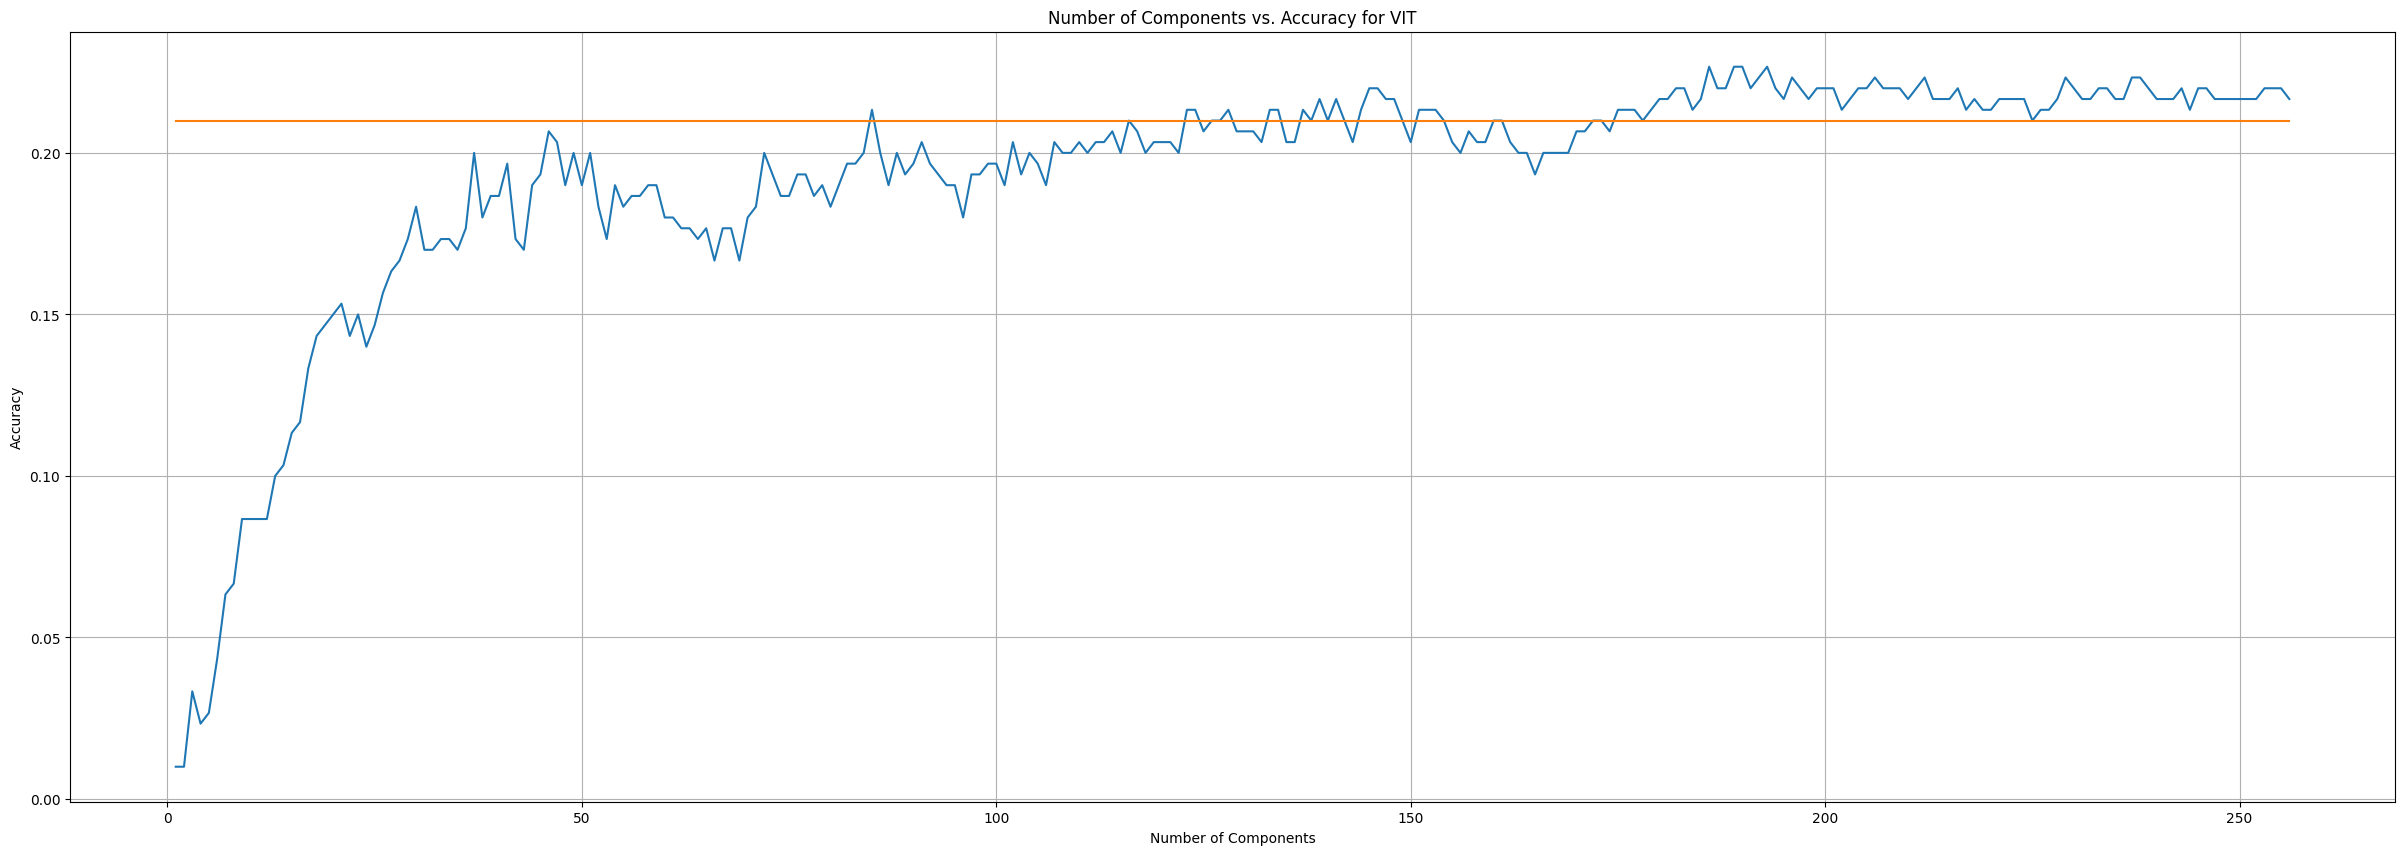

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(n_s, acc_sc, linestyle='-')
plt.plot(n_s, acc_or, linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Number of Components vs. Accuracy for VIT')
plt.grid()
plt.show()

### Observations

As much variation as feasible is retained while the dataset's number of features is reduced through PCA. When dealing with high-dimensional data, as in the case of the given Pictionary Dataset, this can be especially helpful. As a result, we see that when the number of dimensions in the data produced by PCA is reduced, kNN computations are comparatively quicker since there are less characteristics to take into account when creating the distances.

We see for number of components around 200 to 250, the model performs better and is more accurate than full feature dataset

### Observe the impact of dimensionality reduction on the dataset. Use a classifier on the dataset pre and post-dimensionality reduction (if the number of features of the dataset is n, perform dimensionality reduction varying the principal components from 1 to n) and note the accuracies of the classifier.

In [ ]:
# data=X.reshape(X.shape[0],-1)
sorted,V,centered=PCA(X)
n_s=[]
acc_sc=[]
for n in range(1,257):
    reduced_x=get_reduced(sorted,V,centered,n)
    X_train, X_test, y_train, y_test = train_test_split(reduced_x ,y , test_size=0.2, random_state=42)
    k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    predictions=[]
    knn_classifier.fit(X_train, y_train)
    for i in X_test:
        prediction = knn_classifier.predict([i])
        predictions.append(prediction)
    n_s.append(n)
    acc_sc.append(accuracy_score(y_test,predictions))
    # print(n,end=" ")


In [27]:
sorted,V,centered=PCA(X)
new_X=get_reduced(sorted,V,centered,2)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_X ,y , test_size=0.2, random_state=42)
k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
predictions=[]
knn_classifier.fit(X_train, y_train)
for i in X_test:
    prediction = knn_classifier.predict([i])
    predictions.append(prediction)
acc = accuracy_score(y_test,predictions)

acc_or=[acc for i in range(len(acc_sc))]

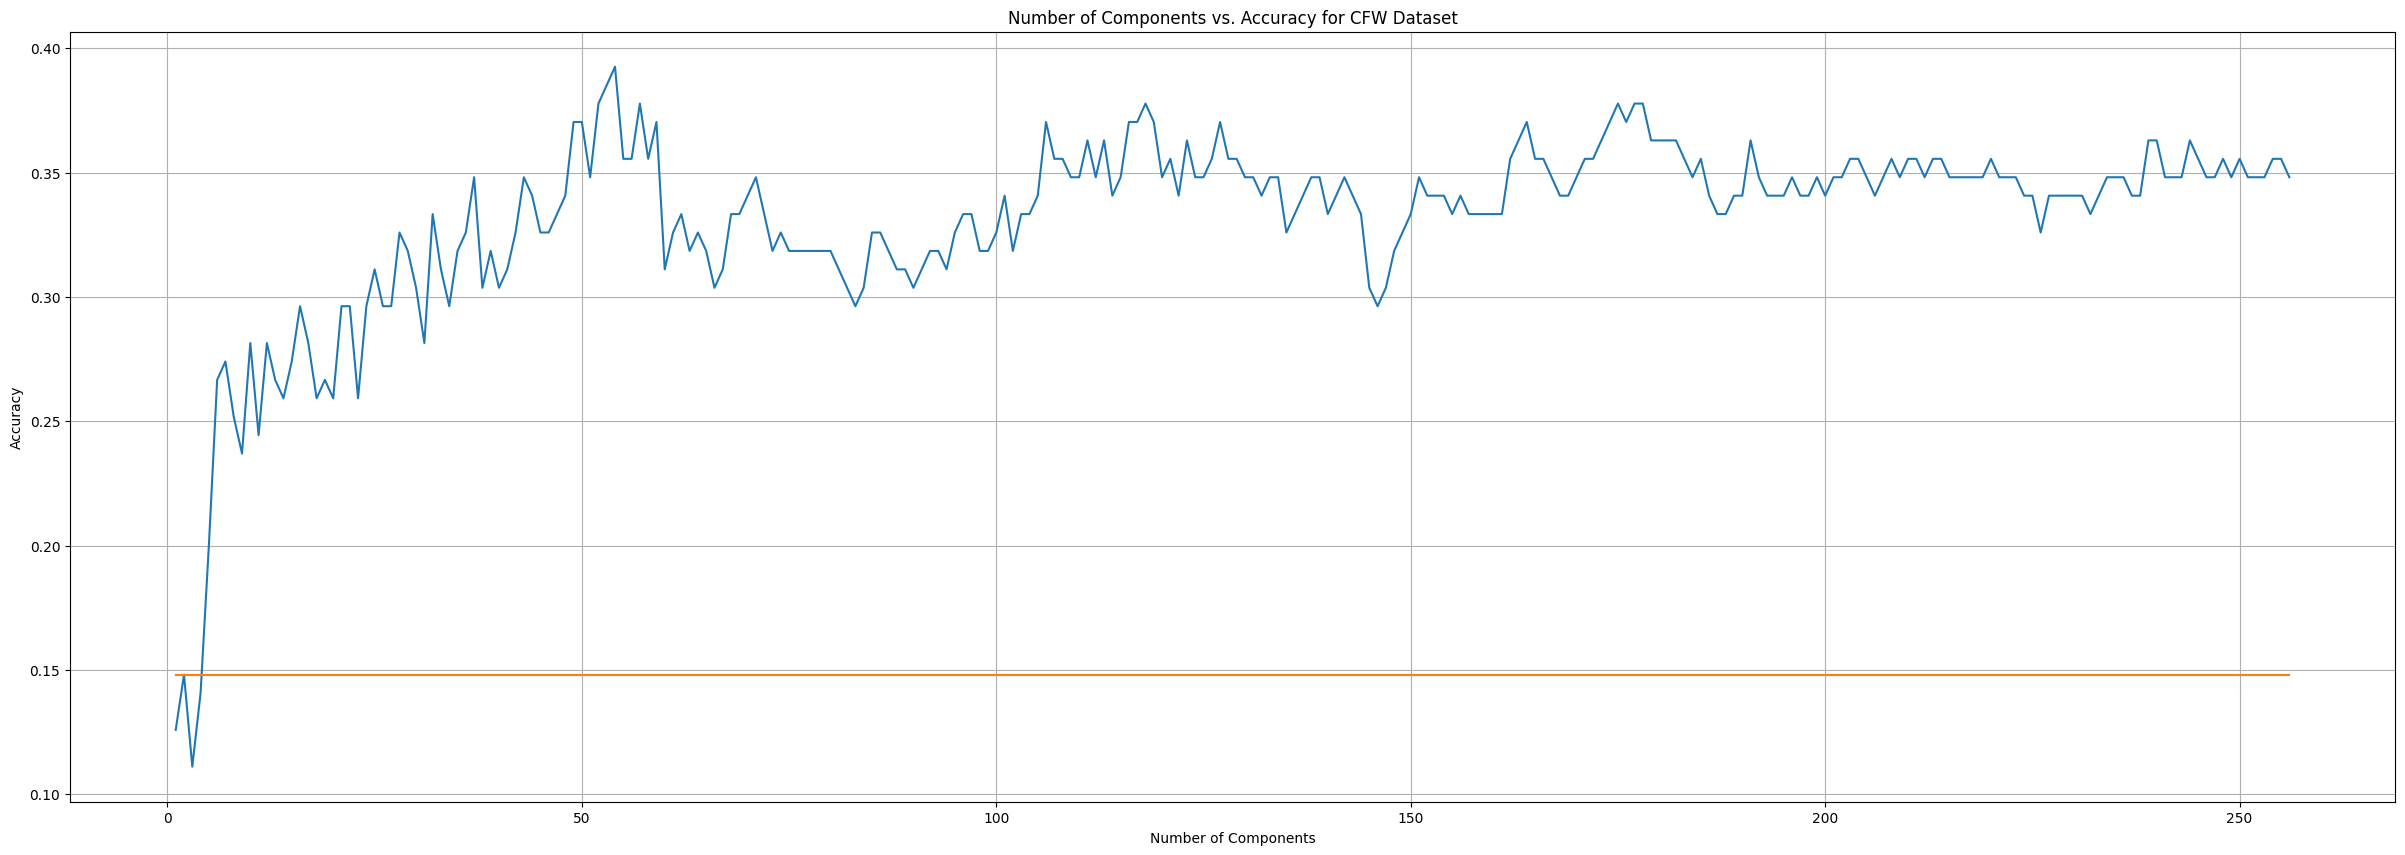

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(n_s, acc_sc, linestyle='-')
plt.plot(n_s, acc_or, linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Number of Components vs. Accuracy for CFW Dataset')
plt.grid()
plt.show()

### Observation

We find that the model generalises better when PCA is used because it would otherwise tend to overfit as the number of features increased. As can be seen from the figure above, utilising PCA with the right number of features allows us to obtain results that are more accurate when compared to data that has high dimensionality.

## 1.2 Pictionary Dataset

In [31]:
import pandas as pd

data=pd.read_csv("smai_assignment_pictionary/drawer_attributes.csv")

X=[]
for j in range(100):
    X.append([])
    for i in data:
        X[j].append(data[i][j])
X_=np.array(X)


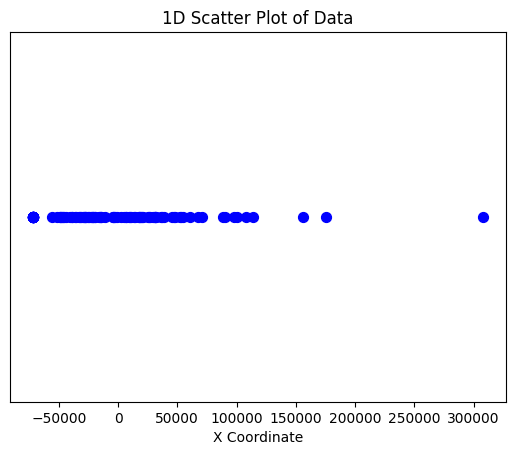

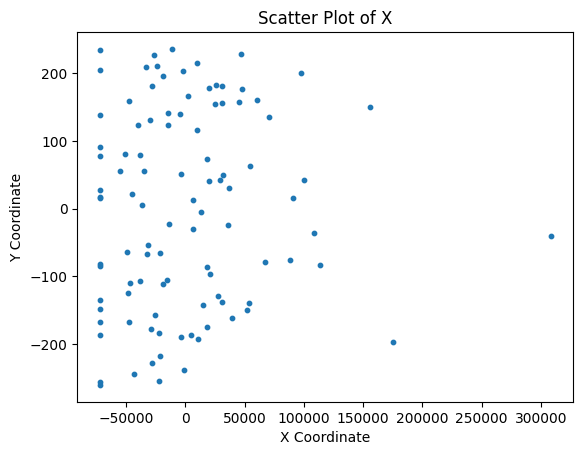

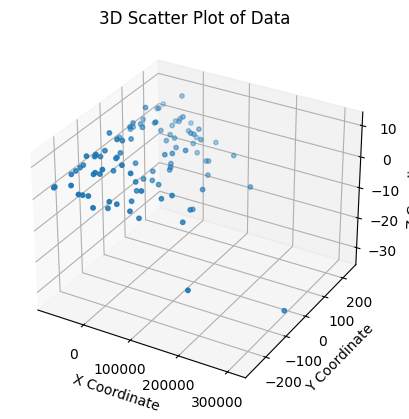

In [32]:
s,v,c=PCA(X_)
X=get_reduced(s,v,c,1)

if X.shape[1]==1:
    y_values = np.zeros(len(X))

    plt.scatter(X, y_values, marker='o', s=50, c='b')

    plt.xlabel('X Coordinate')
    plt.title('1D Scatter Plot of Data')

    plt.gca().axes.get_yaxis().set_visible(False)

    plt.show()

s,v,c=PCA(X_)
X=get_reduced(s,v,c,2)
    
if X.shape[1]==2:
    x_coords = [point[0] for point in X]
    y_coords = [point[1] for point in X]

    plt.scatter(x_coords, y_coords, s=10)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of X')

    plt.show()

s,v,c=PCA(X_)
X=get_reduced(s,v,c,3)

if X.shape[1]==3:
    x_coords = [point[0] for point in X]
    y_coords = [point[1] for point in X]
    z_coords = [point[2] for point in X]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_coords, y_coords, z_coords, s=10)

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title('3D Scatter Plot of Data')

    plt.show()

In [33]:
import pandas as pd

data=pd.read_csv("smai_assignment_pictionary/guesser_attributes.csv")

X=[]

for j in range(100):
    X.append([])
    for i in data:
        X[j].append(data[i][j])

X_=np.array(X)


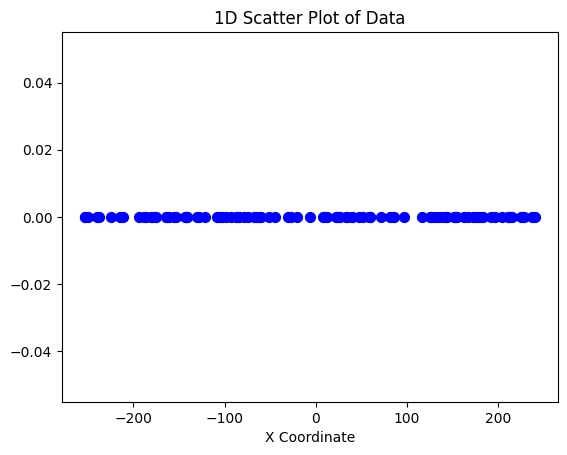

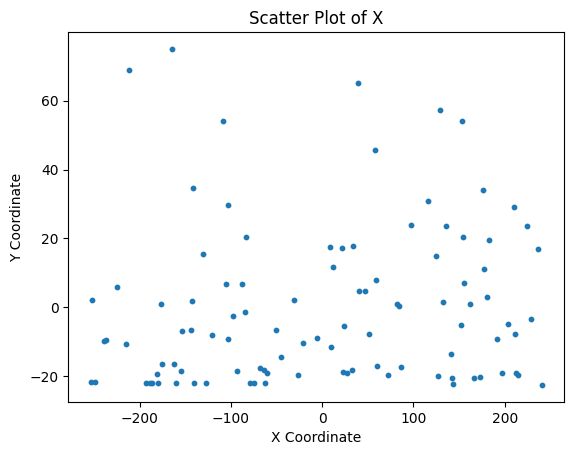

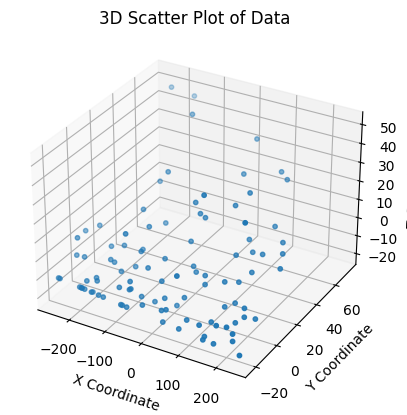

In [34]:
s,v,c=PCA(X_)
X=get_reduced(s,v,c,1)

if X.shape[1]==1:
    y_values = np.zeros(len(X))

    plt.scatter(X, y_values, marker='o', s=50, c='b')

    plt.xlabel('X Coordinate')
    plt.title('1D Scatter Plot of Data')

    plt.show()

s,v,c=PCA(X_)
X=get_reduced(s,v,c,2)
    
if X.shape[1]==2:
    x_coords = [point[0] for point in X]
    y_coords = [point[1] for point in X]

    plt.scatter(x_coords, y_coords, s=10)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of X')

    plt.show()

s,v,c=PCA(X_)
X=get_reduced(s,v,c,3)

if X.shape[1]==3:
    x_coords = [point[0] for point in X]
    y_coords = [point[1] for point in X]
    z_coords = [point[2] for point in X]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_coords, y_coords, z_coords, s=10) 

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title('3D Scatter Plot of Data')

    plt.show()

### Observations

The most significant direction of variance in the data is represented by the first principal component (PC1) of the analysis. The most frequent or dominating patterns in the drawings may be captured by PC1 for the drawer. PC1 can represent for the guesser the most prevalent traits or patterns used to guess the artwork.

Second Principal Component, PC2, reflects the second most important direction of variance and is orthogonal (i.e., uncorrelated) to PC1. PC2 may record changes or patterns unique from those in PC1 in the drawer's casing. PC2 can be seen by the guesser as further features that aid in further refining guesses.

The third most important direction of variance is represented by the third principal component, or PC3. It catches extra data variances that PC1 and PC2 did not take into account.